In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Importar o ficheiro
df = pd.read_csv('C:\\Users\\guilh\\Desktop\\AASE\\Projeto\\csv\\train.csv', sep=";", header=0)

In [3]:
                        #BRAND
#Como é possível verificar no gráfico de barras, a maior queda de valores é entre chevrolet para porshe. Portanto, vamos considerar os valores "Ford", "BMW", "Mercedes" e "Chevorlet", os outros valores vão ser populados com "Outro"
allowed_brands = ['Ford', 'Mercedes-Benz', 'BMW', 'Chevrolet']
df['brand'] = df['brand'].apply(lambda x: x if x in allowed_brands else 'Other')

In [4]:
                        #MODEL
#Como vimos na matriz da correlação, a marca não interfere no preço do automóvel, pelo que pode ser removida.
#drop the model column
df.drop('model', axis = 1, inplace = True)

In [5]:
                        #MODEL_YEAR
#Dividimos as datas tipo-  2000-2005 | 2005-2010 ... ?????
                 

In [6]:
                        #MILAGE
#Alterar o tipo da coluna para numero e converter de milhas para kilometros, para melhor compreensão.

# Alterar a coluna milage para float e depois converter para km
df['milage'] = df['milage'].str.split(" ", expand = True)[0].str.replace(',', '').astype(float)


# converter milhas para kilometros
mile_to_km = 0.621371
df['kilometers'] = df['milage'] / mile_to_km

# Arredondar os valores em 2 casas decimais
df['kilometers'] = df['kilometers'].round(0).astype(int)


In [7]:
                        #FUEL TYPE

# Juntar os hibridos todos, 
df.loc[df['fuel_type'].str.contains('Hybrid', na=False), 'fuel_type'] = 'Hybrid'
df.loc[df['fuel_type'].str.contains('–', na=False), 'fuel_type'] = 'No data'
df.loc[df['fuel_type'].str.strip() == '', 'fuel_type'] = 'No data'
df.loc[df['fuel_type'] == 'not supported', 'fuel_type'] = 'Hydrogen' # (só existe um carro com este valor: Toyota -Mirai Limited, movido a hidrogénio)
# Todos os valores que estão nulos são eletricos
df['fuel_type'].fillna('Eletric', inplace=True)


In [8]:
                    #ENGINE

#Separar os valores do motor em "Horsepower", "Cilinders" and "Litres"
split_engine = df['engine'].str.split(' ',expand = True)

split_engine.loc[split_engine[0].str.contains('HP'), 'horsepower'] = split_engine.loc[split_engine[0].str.contains('HP'), 0].str.replace('HP', "").astype(float)
split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = split_engine.loc[(split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', "").astype(float)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == 'Cylinder'), 'cylinders'] = split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == 'Cylinder'), 2].str.replace('V', "").astype(int)
split_engine.loc[split_engine[0].str.contains('HP') & (split_engine[3] == '6'), 'cylinders'] = 6

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('L')), 0].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[0].str.contains('V'))][0].str.replace('V', ''), errors = 'coerce'))


split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 'litres'] = pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('L')), 1].str.replace('L', ''), errors = 'coerce')
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('I'))][1].str.replace('I', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('H'))][1].str.replace('H', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('W'))][1].str.replace('W', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V')), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].str.contains('V'))][1].str.replace('V', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))])), 'cylinders'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[1].isin([str(x) for x in list(range(20))]))][1].astype(float)

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('V')) & (split_engine['cylinders'].isnull())][2].str.replace('V', '')))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('I')) & (split_engine['cylinders'].isnull())][2].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinders'].isnull()), 'litres'] = split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[2].str.contains('L')) & (split_engine['cylinders'].isnull())][2].str.replace('L', '').astype(float)


split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[3].str.contains('V')) & (split_engine['cylinders'].isnull())][3].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('I')) & (split_engine['cylinders'].isnull())][4].str.replace('I', ''), errors = 'coerce'))
split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinders'].isnull()), 'cylinders'] = abs(pd.to_numeric(split_engine.loc[(~split_engine[0].str.contains('HP')) & (split_engine[4].str.contains('V')) & (split_engine['cylinders'].isnull())][4].str.replace('V', ''), errors = 'coerce'))

split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull()), 'litres'] = split_engine.loc[(split_engine[1] == 'Liter') & (split_engine['litres'].isnull())][0].astype(float)

df = pd.concat([df, split_engine[['horsepower', 'litres', 'cylinders']]], axis = 1)



df[['engine', 'horsepower', 'litres', 'cylinders']].head(100)

,engine,horsepower,litres,cylinders
0,285.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,285.0,3.6,6.0
1,270.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,270.0,3.5,6.0
2,208.0HP 2.5L 4 Cylinder Engine Gas/Electric Hy...,208.0,2.5,4.0
3,260.0HP 2.4L 4 Cylinder Engine Gasoline Fuel,260.0,2.4,4.0
4,301.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,301.0,4.6,8.0
...,...,...,...,...
95,449.0HP 4.7L 8 Cylinder Engine Gasoline Fuel,449.0,4.7,8.0
96,175.0HP 3.9L V6 Cylinder Engine Gasoline Fuel,175.0,3.9,6.0
97,420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel,420.0,6.2,8.0
98,420.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,420.0,4.2,8.0


In [9]:
                #ENGINE
#substituimos os valores nulos pela media dos valores
df['horsepower'].fillna(df['horsepower'].mean(), inplace = True)
df['litres'].fillna(df['litres'].mean(), inplace = True)
df['cylinders'].fillna(df['cylinders'].mean(), inplace = True)


In [10]:
# TRANSMISSION
# Vamos manter apenas "Automatic", "Manual", "DCT", "No data"
df['transmission'] = df['transmission'].str.lower()

df.loc[df['transmission'].str.contains('automatic|a/t|at|auto|cvt'), 'transmission'] = 'Automatic'
df.loc[df['transmission'].str.contains('m/t|manual|mt'), 'transmission'] = 'Manual'
df.loc[df['transmission'].str.contains('dual shift mode'), 'transmission'] = 'DCT'
df.loc[df['transmission'].str.contains('–|2|f|7-speed|variable'), 'transmission'] = 'No data'

# Preencher valores nulos com 'No data'
df['transmission'].fillna('No data', inplace=True)


In [11]:
                #EXT_COLOR


# Substituir 'White' por 'White'
df.loc[df['int_col'].str.contains('White', case=False), 'int_col'] = 'White'

# Substituir 'black' por 'black'
df.loc[df['int_col'].str.contains('Black', case=False), 'int_col'] = 'Black'

# Substituir todos os valores que não são "white" ou "black" por "other"
df.loc[~df['ext_col'].isin(['White', 'Black']), 'ext_col'] = 'Other'

In [12]:
                #INT_COLOR


# Substituir os valores baseados em palavras-chave

# Substituir 'beige' por 'beige'
df.loc[df['int_col'].str.contains('Beige', case=False), 'int_col'] = 'Beige'

# Substituir 'black' por 'black'
df.loc[df['int_col'].str.contains('Black', case=False), 'int_col'] = 'Black'

# Substituir 'gray' por 'gray'
df.loc[df['int_col'].str.contains('Gray', case=False), 'int_col'] = 'Gray'

# Substituir todos os valores que não são "white" ou "black" por "other"

df.loc[~df['int_col'].isin(['Beige', 'Black', "Gray"]), 'int_col'] = 'Other'

In [13]:
                #CLEAN_TITLE
# Substituir os valores ausentes na coluna 'clean_title' por "No data"
df['clean_title'].fillna("No data", inplace=True)


In [14]:
                #ACCIDENT
# Substituir os valores ausentes na coluna 'clean_title' por "No data"
df['accident'].fillna("No data", inplace=True)

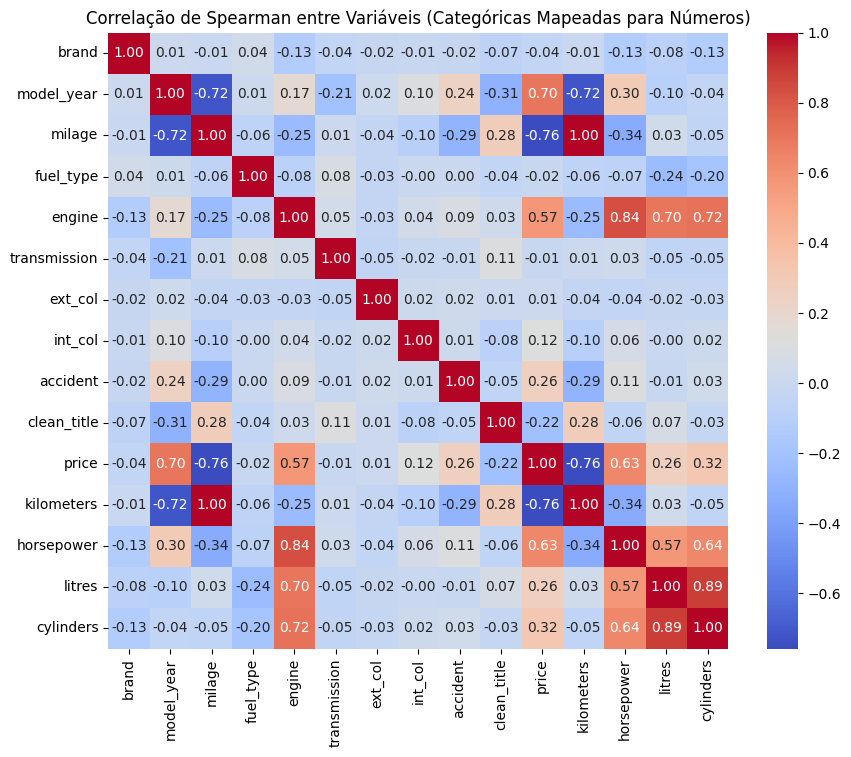

In [15]:
from sklearn.preprocessing import LabelEncoder

# Seleciona apenas as colunas não numéricas
categorical_columns = df.select_dtypes(include='object').columns

# Inicializa o LabelEncoder
label_encoder = LabelEncoder()

# Mapeia as categorias para números
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Calcule a matriz de correlação de Spearman
correlation_matrix = df.corr(method='spearman')

# Visualize a matriz de correlação usando um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação de Spearman entre Variáveis (Categóricas Mapeadas para Números)')
plt.show()


In [16]:
#------------------------------REMOVER TODAS AS COLUNAS QUE A CORRELAÇÃO COM PREÇO SEJA INFERIOR A 0.5 -----------
colunas_para_eliminar = ['cylinders', 'litres', "clean_title", "accident", "int_col", "ext_col", "transmission", "engine", "fuel_type", "milage", "brand" ]
# Eliminar as colunas especificadas
df = df.drop(colunas_para_eliminar, axis=1)

In [17]:
#MODELING

In [18]:
# Change to classification
df = df.dropna();

In [19]:
df['price'].mean()

44870.24415341441

In [20]:
import pandas as pd

# Substitua 'coluna_preco' pelo nome real da coluna de preços em seu conjunto de dados
df['price_type'] = pd.qcut(df['price'], q=[i/50 for i in range(51)], labels=[f'Category {i}' for i in range(1, 51)])

# Visualize as categorias criadas e seus valores mínimos e máximos
categories_summary = df.groupby('price_type')['price'].agg(['min', 'max'])
print(categories_summary)


                min      max
price_type                  
Category 1     2000     5000
Category 2     5100     6500
Category 3     6600     7500
Category 4     7599     8500
Category 5     8550     9888
Category 6     9900    10750
Category 7    10795    11995
Category 8    11999    12900
Category 9    12950    13980
Category 10   13995    15000
Category 11   15100    15900
Category 12   15990    16800
Category 13   16900    17899
Category 14   17900    18750
Category 15   18795    19900
Category 16   19950    20999
Category 17   21000    22000
Category 18   22222    23500
Category 19   23598    24900
Category 20   24950    25999
Category 21   26000    27000
Category 22   27200    28251
Category 23   28298    29000
Category 24   29255    30000
Category 25   30275    31698
Category 26   31700    32900
Category 27   32913    34000
Category 28   34084    35297
Category 29   35300    36500
Category 30   36570    37999
Category 31   38000    39000
Category 32   39100    40500
Category 33   

C:\Users\guilh\AppData\Local\Temp\ipykernel_5848\924215571.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  categories_summary = df.groupby('price_type')['price'].agg(['min', 'max'])


In [21]:
import warnings
warnings.filterwarnings("ignore")

In [22]:

from sklearn.metrics import (
        make_scorer,
        confusion_matrix, 
        cohen_kappa_score, 
        accuracy_score, 
        precision_score, 
        recall_score, 
        f1_score, 
        roc_auc_score
)
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier # decision trees for classification
from sklearn.neural_network import  MLPClassifier # neural networks for classification
from sklearn.naive_bayes import GaussianNB # naive bayes for classification
from sklearn.svm import SVC # support vector machines for classification

In [23]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn+fp)

In [24]:
METRICS = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average='weighted'),
    "recall": make_scorer(recall_score, average='weighted'),
    "f1": make_scorer(f1_score, average='weighted'),
    "AUC": make_scorer(roc_auc_score, needs_proba=True, multi_class='ovr', average='weighted'),
    "specificity": make_scorer(specificity_score),
    "kappa": make_scorer(cohen_kappa_score)
}


In [25]:
X, y = df.drop("price_type", axis=1), df["price_type"]

In [26]:
dt = DecisionTreeClassifier(max_depth=100, random_state=1234)
splitter = StratifiedKFold(10, random_state=1234, shuffle=True)
scores = cross_validate(dt, X, y, cv=splitter, scoring=METRICS)
dt_scores = pd.DataFrame(scores)
pd.DataFrame(dt_scores.mean()).T

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_AUC,test_specificity,test_kappa
0,0.026083,0.053374,0.995014,0.995678,0.995014,0.994937,0.997455,NaN,0.994911


In [27]:
nn = MLPClassifier(hidden_layer_sizes=(50,50), max_iter=20, random_state=1234)
scores_nn = cross_validate(nn, X, y, cv=splitter, scoring=METRICS)
nn_scores = pd.DataFrame(scores_nn)
pd.DataFrame(nn_scores.mean()).T

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_AUC,test_specificity,test_kappa
0,0.537675,0.043846,0.068909,0.031287,0.068909,0.033927,0.755667,NaN,0.049645


In [28]:
nb = GaussianNB()
scores_nb = cross_validate(nb, X, y, cv=splitter, scoring=METRICS)
nb_scores = pd.DataFrame(scores_nb)
pd.DataFrame(nb_scores.mean()).T

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_AUC,test_specificity,test_kappa
0,0.012652,0.054717,0.93171,0.941018,0.93171,0.930941,0.999553,NaN,0.930298


In [29]:
svm = SVC(random_state=1234, probability=True)
scores_svm = cross_validate(svm, X, y, cv=splitter, scoring=METRICS)
svm_scores = pd.DataFrame(scores_svm)
pd.DataFrame(svm_scores.mean()).T

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_AUC,test_specificity,test_kappa
0,2.867619,0.428212,0.165879,0.126587,0.165879,0.125487,0.888634,NaN,0.147324
